
# Stop-and-Search Prediction Model

### Import libraries and analyze dataset

In [79]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [80]:
crime_df = pd.read_csv('crime_data.csv')

crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37188 entries, 0 to 37187
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type                                      37188 non-null  object 
 1   Date                                      37188 non-null  object 
 2   Part of a policing operation              37188 non-null  bool   
 3   Policing operation                        0 non-null      float64
 4   Latitude                                  35391 non-null  float64
 5   Longitude                                 35391 non-null  float64
 6   Gender                                    34640 non-null  object 
 7   Age range                                 34945 non-null  object 
 8   Self-defined ethnicity                    36858 non-null  object 
 9   Officer-defined ethnicity                 35755 non-null  object 
 10  Legislation                       

In [81]:
crime_df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person and Vehicle search,2022-07-31T23:00:00+00:00,False,NaN,53.634537,-1.797026,Male,18-24,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
1,Person search,2022-07-31T23:05:00+00:00,False,NaN,53.704337,-1.602643,Male,25-34,White - Gypsy or Irish Traveller,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False
2,Person search,2022-07-31T23:05:00+00:00,False,NaN,53.700954,-1.596238,Male,over 34,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False
3,Person search,2022-07-31T23:05:00+00:00,False,NaN,53.700954,-1.596238,Male,25-34,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False
4,Person and Vehicle search,2022-07-31T23:05:00+00:00,False,NaN,53.704337,-1.602643,Male,over 34,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False


In [82]:
crime_df.isnull().sum()

Type                                            0
Date                                            0
Part of a policing operation                    0
Policing operation                          37188
Latitude                                     1797
Longitude                                    1797
Gender                                       2548
Age range                                    2243
Self-defined ethnicity                        330
Officer-defined ethnicity                    1433
Legislation                                  1087
Object of search                              836
Outcome                                       278
Outcome linked to object of search            274
Removal of more than just outer clothing       86
dtype: int64

### Convert everything to a number

In [83]:
def map_outcome(value):
    if value == 'A no further action disposal':
        return 0
    else:
        return 1
crime_df['outcome'] = crime_df['Outcome'].apply(map_outcome)
crime_df = crime_df.drop('Outcome', axis=1)

crime_df["outcome"].value_counts()

outcome
0    25470
1    11718
Name: count, dtype: int64

In [84]:
crime_df_encoded = pd.get_dummies(data=crime_df, columns=["Type", "Gender", "Age range", "Self-defined ethnicity", "Officer-defined ethnicity", "Object of search"])
crime_df_encoded.head()

,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Legislation,Outcome linked to object of search,Removal of more than just outer clothing,outcome,Type_Person and Vehicle search,...,Officer-defined ethnicity_White,Object of search_Article for use in theft,Object of search_Articles for use in criminal damage,Object of search_Controlled drugs,Object of search_Evidence of offences under the Act,Object of search_Firearms,Object of search_Fireworks,Object of search_Offensive weapons,Object of search_Psychoactive substances,Object of search_Stolen goods
0,2022-07-31T23:00:00+00:00,False,NaN,53.634537,-1.797026,Misuse of Drugs Act 1971 (section 23),False,False,0,True,...,False,False,False,True,False,False,False,False,False,False
1,2022-07-31T23:05:00+00:00,False,NaN,53.704337,-1.602643,Misuse of Drugs Act 1971 (section 23),True,False,1,False,...,True,False,False,True,False,False,False,False,False,False
2,2022-07-31T23:05:00+00:00,False,NaN,53.700954,-1.596238,Misuse of Drugs Act 1971 (section 23),True,False,0,False,...,False,False,False,True,False,False,False,False,False,False
3,2022-07-31T23:05:00+00:00,False,NaN,53.700954,-1.596238,Misuse of Drugs Act 1971 (section 23),True,False,0,False,...,False,False,False,True,False,False,False,False,False,False
4,2022-07-31T23:05:00+00:00,False,NaN,53.704337,-1.602643,Misuse of Drugs Act 1971 (section 23),True,False,1,True,...,False,False,False,True,False,False,False,False,False,False


### Check for corelation

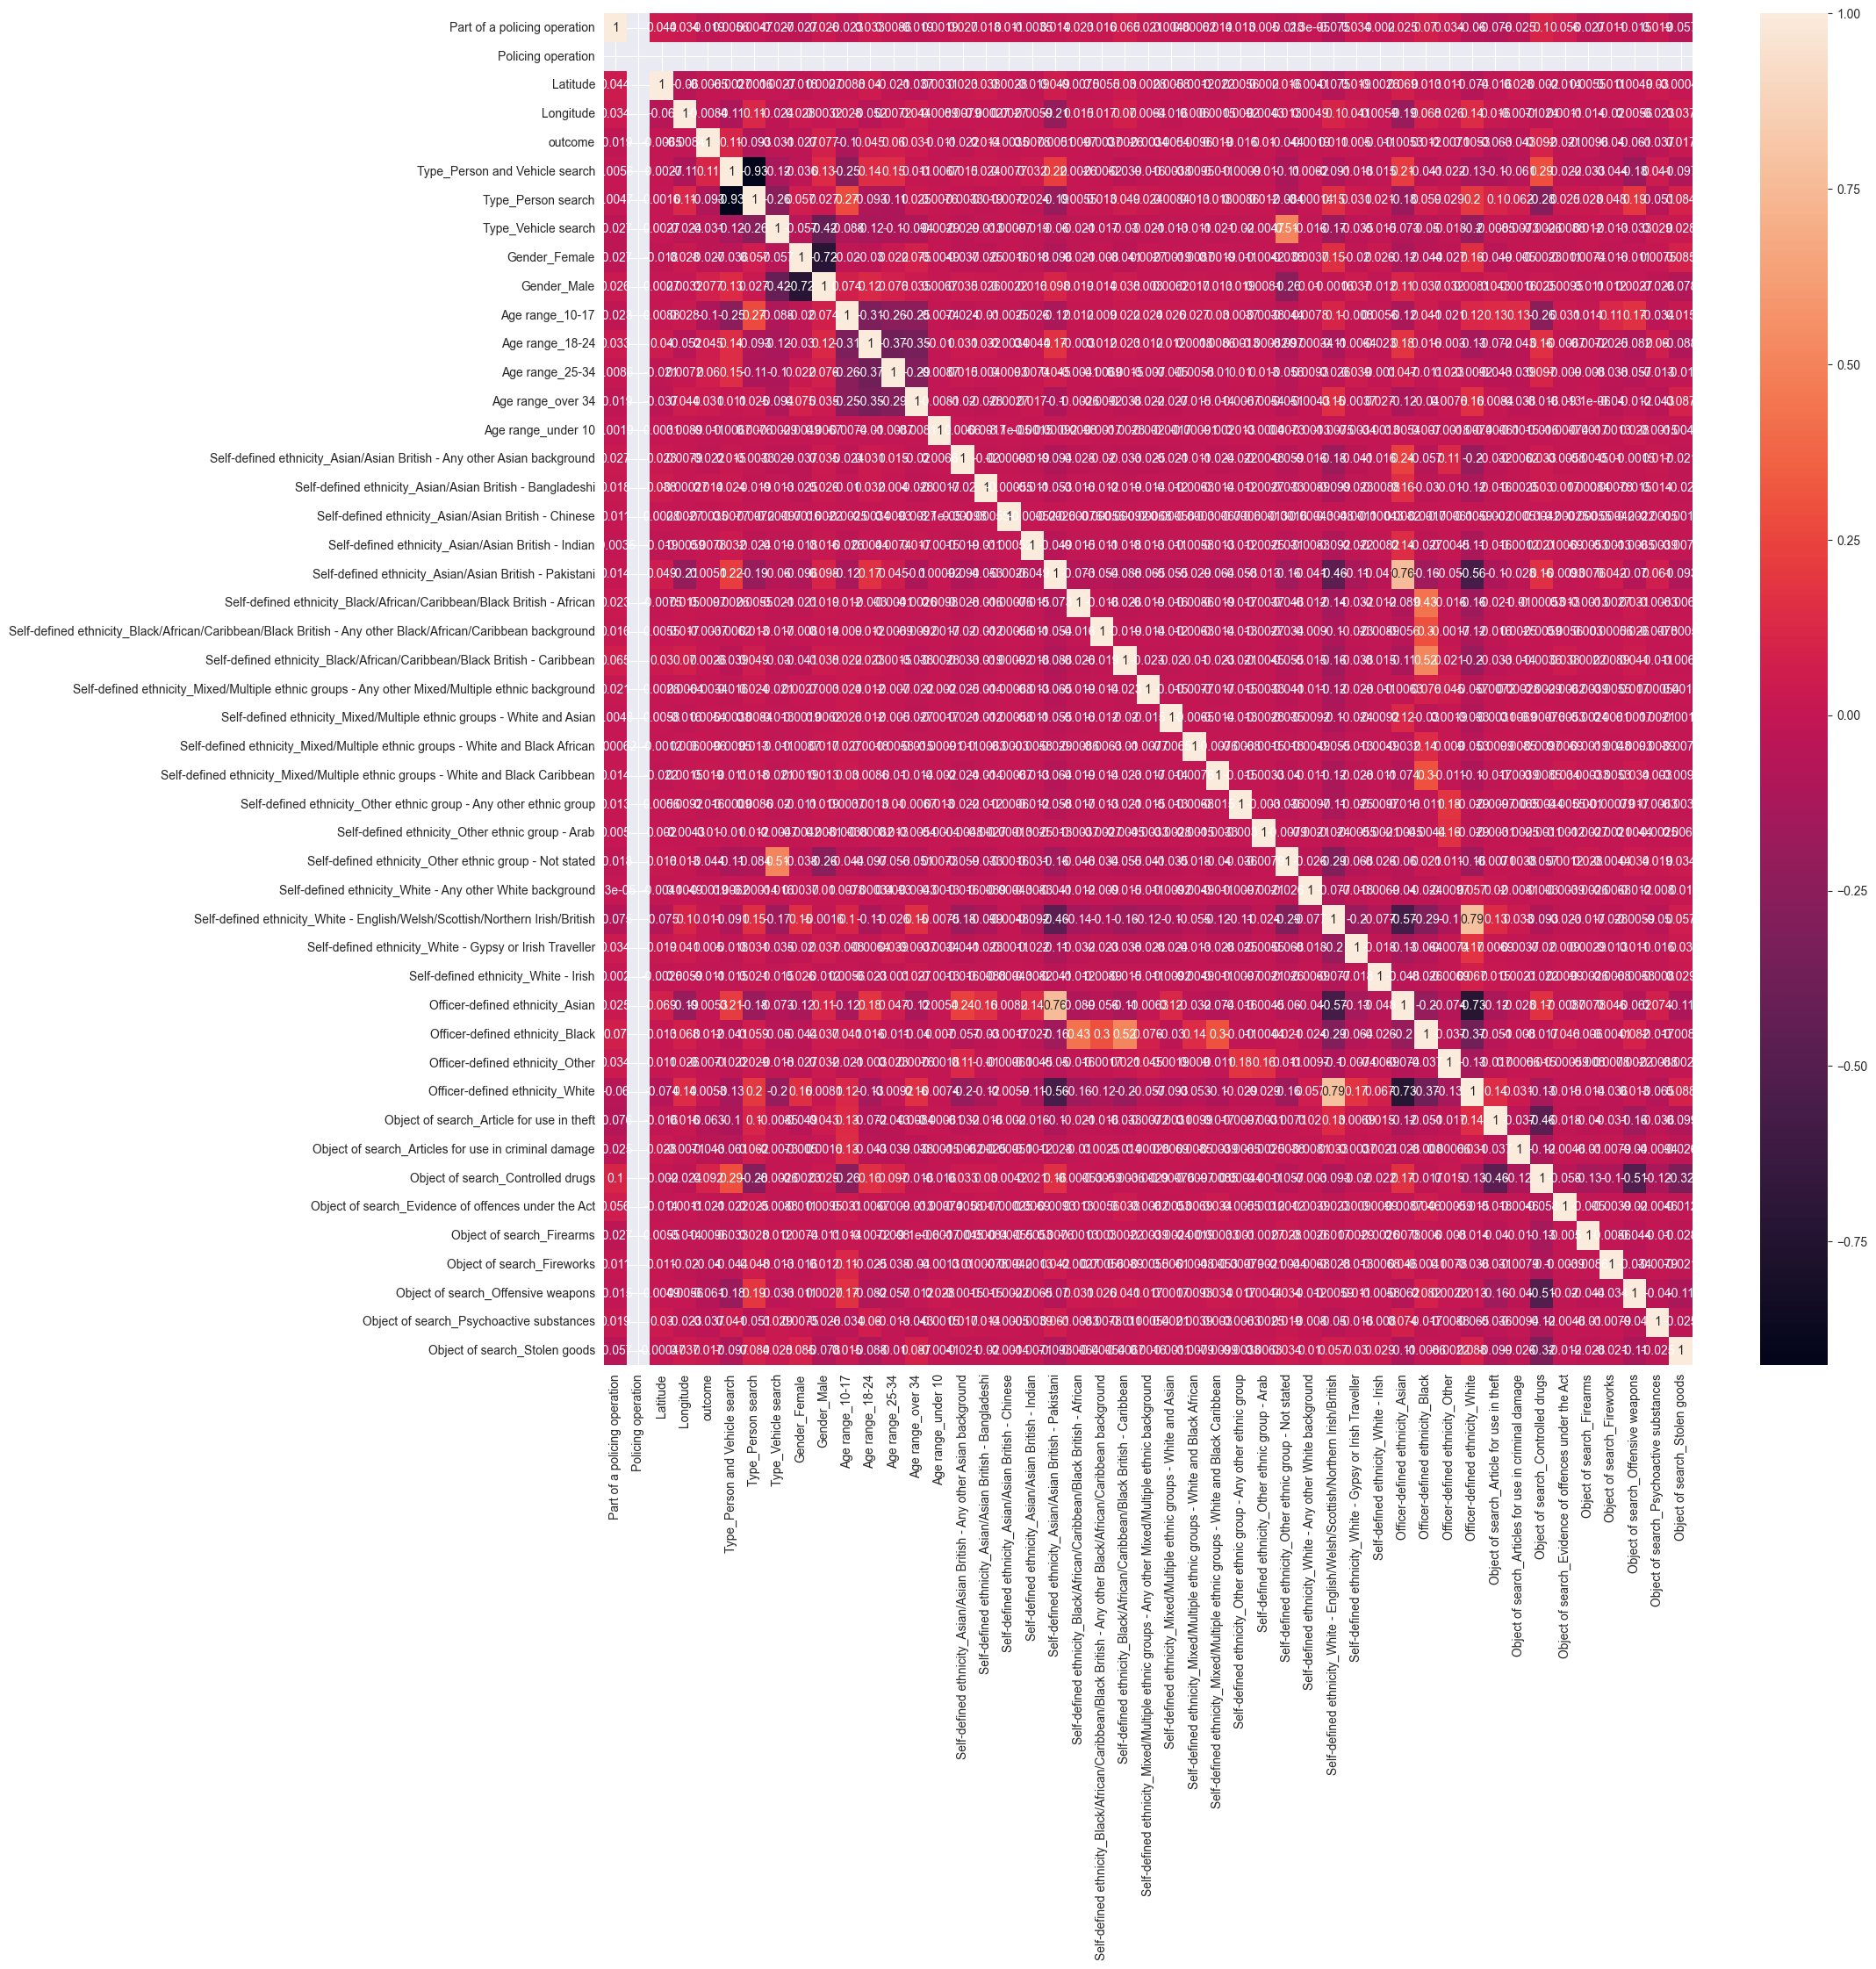

In [85]:
corr = crime_df_encoded.corr(numeric_only=True)

plt.figure(figsize = (20,20))
sns.heatmap(corr, annot=True)
plt.show()

### Split the training and testing dataset

In [86]:
import sklearn
from sklearn.model_selection import train_test_split

crime_df_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in crime_df_encoded.columns]
crime_df_encoded.head()

,date,part_of_a_policing_operation,policing_operation,latitude,longitude,legislation,outcome_linked_to_object_of_search,removal_of_more_than_just_outer_clothing,outcome,type_person_and_vehicle_search,...,officer-defined_ethnicity_white,object_of_search_article_for_use_in_theft,object_of_search_articles_for_use_in_criminal_damage,object_of_search_controlled_drugs,object_of_search_evidence_of_offences_under_the_act,object_of_search_firearms,object_of_search_fireworks,object_of_search_offensive_weapons,object_of_search_psychoactive_substances,object_of_search_stolen_goods
0,2022-07-31T23:00:00+00:00,False,NaN,53.634537,-1.797026,Misuse of Drugs Act 1971 (section 23),False,False,0,True,...,False,False,False,True,False,False,False,False,False,False
1,2022-07-31T23:05:00+00:00,False,NaN,53.704337,-1.602643,Misuse of Drugs Act 1971 (section 23),True,False,1,False,...,True,False,False,True,False,False,False,False,False,False
2,2022-07-31T23:05:00+00:00,False,NaN,53.700954,-1.596238,Misuse of Drugs Act 1971 (section 23),True,False,0,False,...,False,False,False,True,False,False,False,False,False,False
3,2022-07-31T23:05:00+00:00,False,NaN,53.700954,-1.596238,Misuse of Drugs Act 1971 (section 23),True,False,0,False,...,False,False,False,True,False,False,False,False,False,False
4,2022-07-31T23:05:00+00:00,False,NaN,53.704337,-1.602643,Misuse of Drugs Act 1971 (section 23),True,False,1,True,...,False,False,False,True,False,False,False,False,False,False


In [87]:
X = crime_df_encoded[['part_of_a_policing_operation', 'latitude', 'longitude',
                      'type_person_and_vehicle_search', 'type_person_search',
                      'type_vehicle_search', 'gender_female', 'gender_male',
                      'age_range_10-17', 'age_range_18-24', 'age_range_25-34',
                      'age_range_over_34', 'age_range_under_10',
                      'self-defined_ethnicity_asian/asian_british_-_any_other_asian_background',
                      'self-defined_ethnicity_asian/asian_british_-_bangladeshi',
                      'self-defined_ethnicity_asian/asian_british_-_chinese',
                      'self-defined_ethnicity_asian/asian_british_-_indian',
                      'self-defined_ethnicity_asian/asian_british_-_pakistani',
                      'self-defined_ethnicity_black/african/caribbean/black_british_-_african',
                      'self-defined_ethnicity_black/african/caribbean/black_british_-_any_other_black/african/caribbean_background',
                      'self-defined_ethnicity_black/african/caribbean/black_british_-_caribbean',
                      'self-defined_ethnicity_mixed/multiple_ethnic_groups_-_any_other_mixed/multiple_ethnic_background',
                      'self-defined_ethnicity_mixed/multiple_ethnic_groups_-_white_and_asian',
                      'self-defined_ethnicity_mixed/multiple_ethnic_groups_-_white_and_black_african',
                      'self-defined_ethnicity_mixed/multiple_ethnic_groups_-_white_and_black_caribbean',
                      'self-defined_ethnicity_other_ethnic_group_-_any_other_ethnic_group',
                      'self-defined_ethnicity_other_ethnic_group_-_arab',
                      'self-defined_ethnicity_other_ethnic_group_-_not_stated',
                      'self-defined_ethnicity_white_-_any_other_white_background',
                      'self-defined_ethnicity_white_-_english/welsh/scottish/northern_irish/british',
                      'self-defined_ethnicity_white_-_gypsy_or_irish_traveller',
                      'self-defined_ethnicity_white_-_irish',
                      'officer-defined_ethnicity_asian', 'officer-defined_ethnicity_black',
                      'officer-defined_ethnicity_other', 'officer-defined_ethnicity_white',
                      'object_of_search_article_for_use_in_theft',
                      'object_of_search_articles_for_use_in_criminal_damage',
                      'object_of_search_controlled_drugs',
                      'object_of_search_evidence_of_offences_under_the_act',
                      'object_of_search_firearms', 'object_of_search_fireworks',
                      'object_of_search_offensive_weapons',
                      'object_of_search_psychoactive_substances',
                      'object_of_search_stolen_goods']]
y = crime_df_encoded['outcome']

print(X)

       part_of_a_policing_operation   latitude  longitude  \
0                             False  53.634537  -1.797026   
1                             False  53.704337  -1.602643   
2                             False  53.700954  -1.596238   
3                             False  53.700954  -1.596238   
4                             False  53.704337  -1.602643   
...                             ...        ...        ...   
37183                         False  53.710719  -1.627885   
37184                         False  53.858414  -1.923398   
37185                         False  53.858414  -1.923398   
37186                          True  53.858414  -1.923398   
37187                         False  53.828742  -1.397713   

       type_person_and_vehicle_search  type_person_search  \
0                                True               False   
1                               False                True   
2                               False                True   
3                      

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26031, 45)
(11157, 45)
(26031,)
(11157,)


### Train the Random Forest Regressor Model

In [89]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [90]:
y_rf_pred_test = rf_model.predict(X_test)

In [91]:
rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test})

rf_pred_test_df

,Actual,Predicted
13837,0,0.600000
24576,1,0.052500
35053,0,0.247500
15341,0,0.020000
7341,0,0.131667
...,...,...
5461,0,0.424333
22584,1,0.177679
10586,0,0.213947
19395,0,0.235333


In [92]:
from sklearn.metrics import r2_score, mean_squared_error

score = r2_score(y_test, y_rf_pred_test)

print("R^2 - {}%".format(round(score, 2) *100))

R^2 - -5.0%


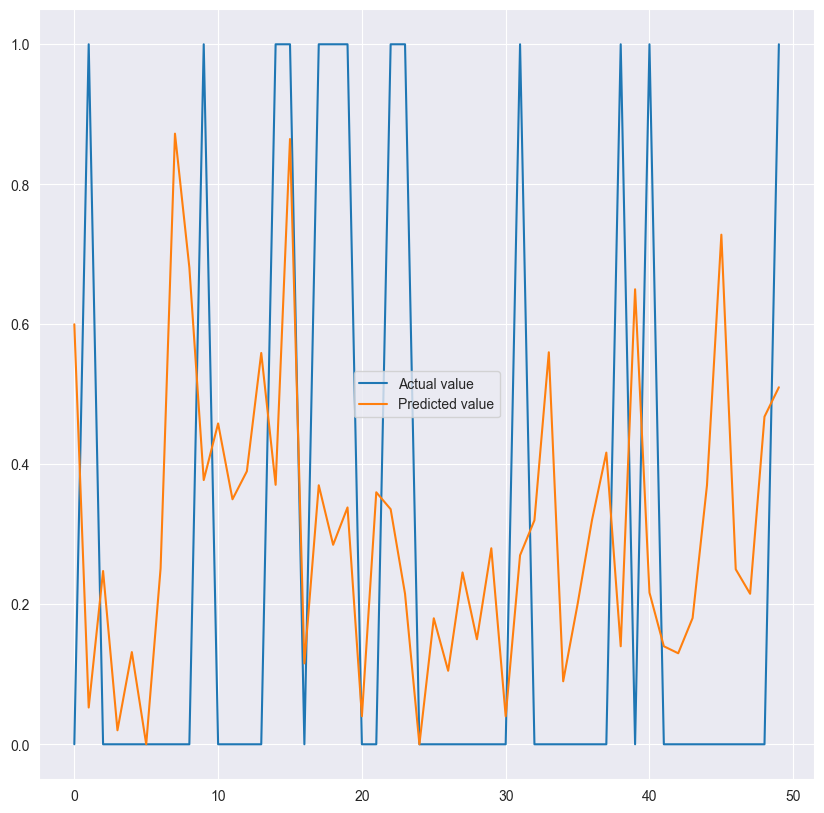

In [93]:
fig= plt.figure(figsize=(10,10))
rf_pred_test_df = rf_pred_test_df.reset_index()
rf_pred_test_df = rf_pred_test_df.drop(['index'],axis=1)
plt.plot(rf_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])